## Anova testing of area patterns

### Permanent crops

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Read the database from a CSV file
data = pd.read_csv('3_perm_crops.csv')

# Reshape the data for ANOVA test
melted_data = pd.melt(data, id_vars=['region_name'], value_vars=['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019'],
                      var_name='Year', value_name='Crop_Area')

# Perform ANOVA test
formula = 'Crop_Area ~ region_name'
model = ols(formula, melted_data).fit()
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

here are the results, the code takes a long time to run

|                |   sum_sq   |    mean_sq      |     F      | PR(>F) |
|:-------------|-----------:|----------------:|----------:|-------:|
| region_name   |     2873.0 |   396091300.000000 | 137866.801400 | 4.699795 |
| Residual      |    83702.0 |  2455368000.000000 | 29334.639872 |    NaN  |


### Temporary crops

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Read the database from a CSV file
data = pd.read_csv('3_temp_crops.csv')

# Reshape the data for ANOVA test
melted_data = pd.melt(data, id_vars=['region_name'], value_vars=['Area_1989', 'Area_1999', 'Area_2009', 'Area_2019'],
                      var_name='Year', value_name='Crop_Area')

# Perform ANOVA test
formula = 'Crop_Area ~ region_name'
model = ols(formula, melted_data).fit()
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

## Join of both crop areas

### joining both tables and graph of area stacked bars

code takes too long to work

                                Nuts_region_perm   NutsID_x       region_name  \
0  111160101_Aboim das Choças_Citrus plantations  111160101  Aboim das Choças   
1  111160101_Aboim das Choças_Citrus plantations  111160101  Aboim das Choças   
2  111160101_Aboim das Choças_Citrus plantations  111160101  Aboim das Choças   

            Perm_crop  Area_1989_x  Area_1999_x  Area_2009_x  Area_2019_x  \
0  Citrus plantations            0            0            0            0   
1  Citrus plantations            0            0            0            0   
2  Citrus plantations            0            0            0            0   

                                    Nuts_region_temp   NutsID_y  \
0                 111160101_Aboim das Choças_Cereals  111160101   
1            111160101_Aboim das Choças_Dried pulses  111160101   
2  111160101_Aboim das Choças_Temporary grasses a...  111160101   

                        Temp_crop  Area_1989_y  Area_1999_y  Area_2009_y  \
0                    

KeyboardInterrupt: 

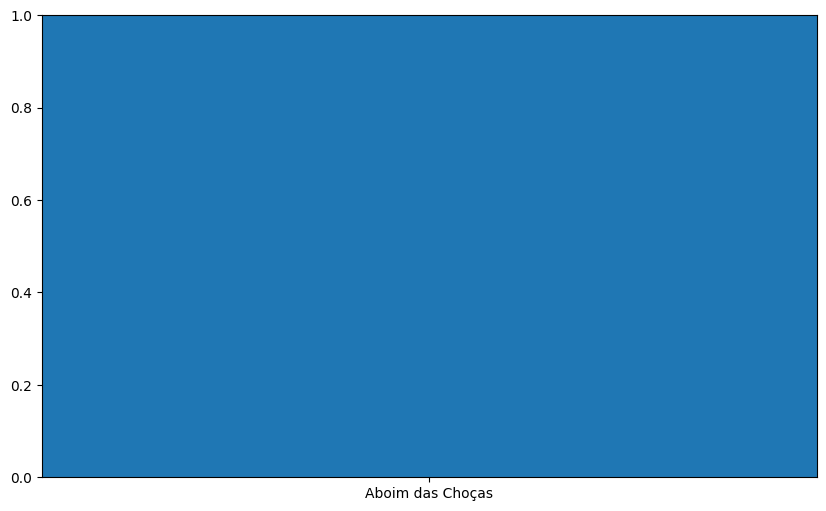

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df_perm = pd.read_csv('3_perm_crops.csv')
df_temp = pd.read_csv('3_temp_crops.csv')

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df_perm = pd.read_csv('3_perm_crops.csv')
df_temp = pd.read_csv('3_temp_crops.csv')

# Merge the dataframes based on the common columns
df_merged = pd.merge(df_perm, df_temp, on=['region_name', 'region_name'])

# Print three lines of the merged dataframe
print(df_merged.head(3))

# Continue with the rest of your code...
# Select the desired columns for the stacked bar chart
years = ['1989', '1999', '2009', '2019']
areas_perm = ['Area_' + year + '_x' for year in years]
areas_temp = ['Area_' + year + '_y' for year in years]

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
bottom_perm = None
bottom_temp = None

for i, year in enumerate(years):
    plt.bar(df_merged['region_name'], df_merged[areas_perm[i]], label=f'Permanent Crops {year}', bottom=bottom_perm)
    bottom_perm = df_merged[areas_perm[i]] if bottom_perm is None else bottom_perm + df_merged[areas_perm[i]]

    plt.bar(df_merged['region_name'], df_merged[areas_temp[i]], label=f'Temporary Crops {year}', bottom=bottom_temp)
    bottom_temp = df_merged[areas_temp[i]] if bottom_temp is None else bottom_temp + df_merged[areas_temp[i]]

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Area')
plt.title('Combined Area of Permanent and Temporary Crops')
plt.xticks(rotation=90)
plt.legend()

# Show the chart
plt.show()




